In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('/Users/amitsubedi/Documents/GitHub/Cardio-Vascular-analysis/mitbih_train.csv',header=None)
test_df=pd.read_csv('/Users/amitsubedi/Documents/GitHub/Cardio-Vascular-analysis/mitbih_test.csv',header=None)

In [3]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)


187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


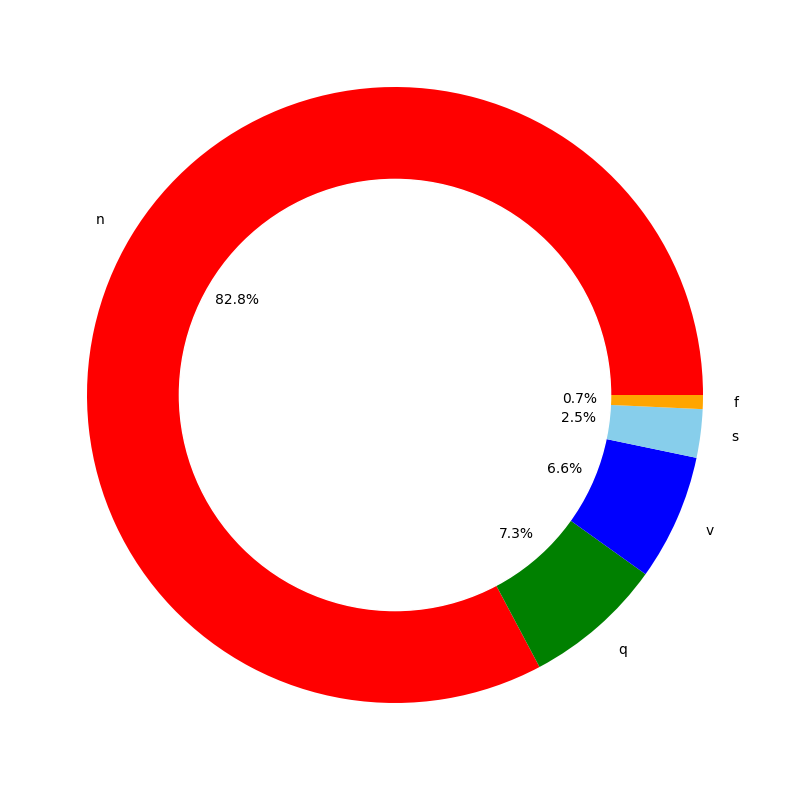

In [4]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [5]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [6]:
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


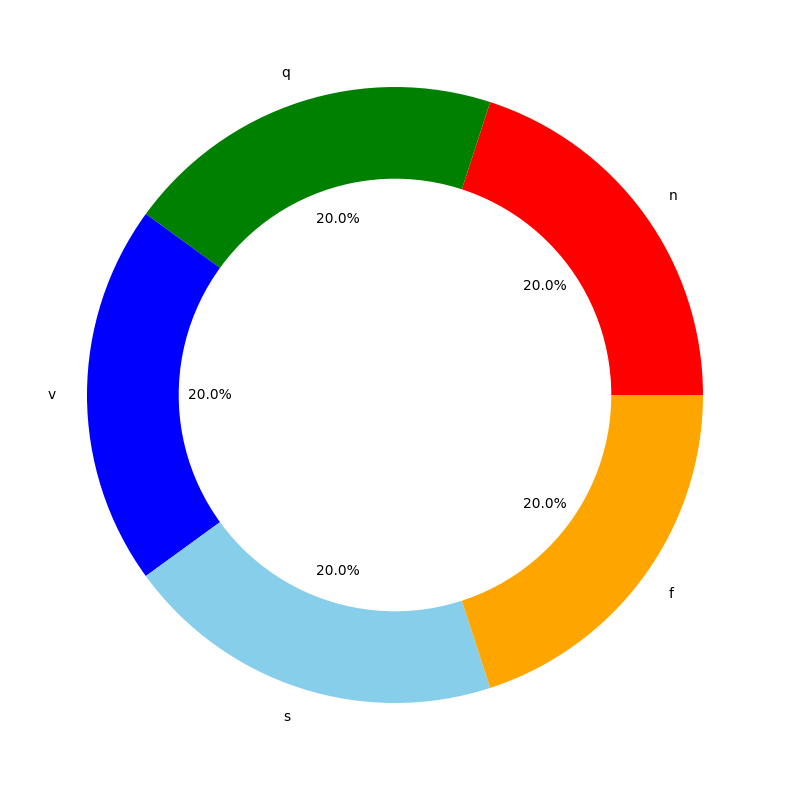

In [7]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [8]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
24040,1.000000,0.745370,0.444444,0.064815,0.032407,0.125000,0.217593,0.263889,0.287037,0.282407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73367,0.000000,0.137536,0.292264,0.392550,0.507163,0.613181,0.687679,0.722063,0.742120,0.762178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
77532,0.789744,0.761538,0.702564,0.697436,0.741026,0.643590,0.443590,0.307692,0.258974,0.194872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80653,1.000000,0.752918,0.371595,0.184825,0.192607,0.169261,0.171206,0.153696,0.165370,0.153696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
87181,0.718901,0.596123,0.479806,0.342488,0.211632,0.109855,0.040388,0.000000,0.006462,0.037157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


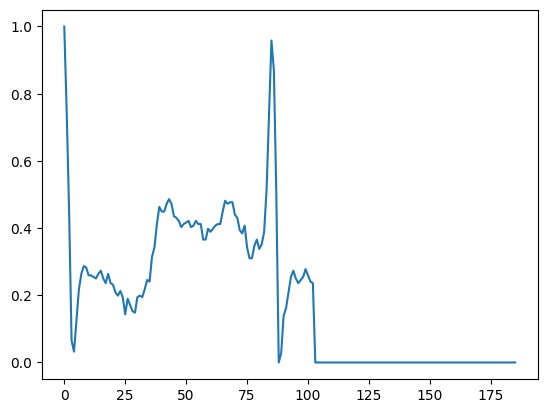

In [9]:
 plt.plot(c.iloc[0,:186])

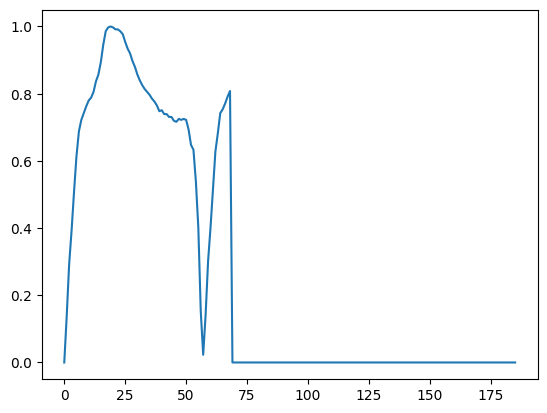

In [10]:
plt.plot(c.iloc[1,:186])

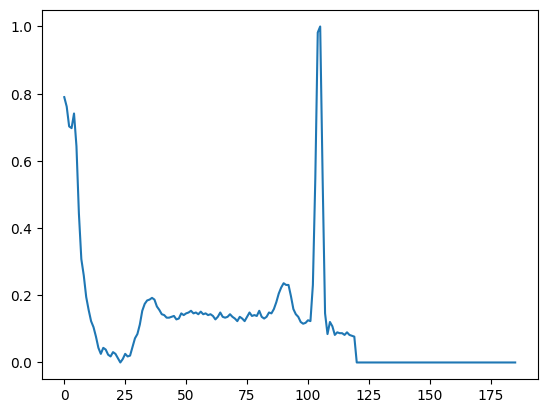

In [11]:
plt.plot(c.iloc[2,:186])

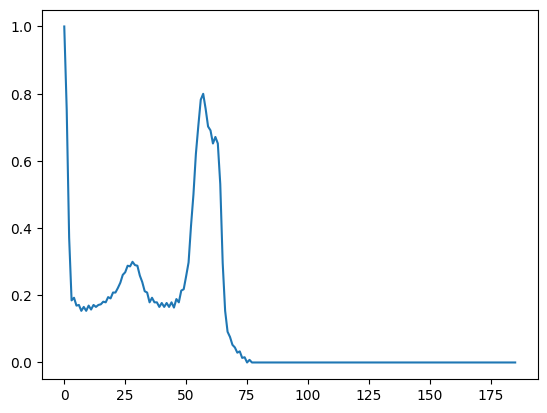

In [12]:
plt.plot(c.iloc[3,:186])

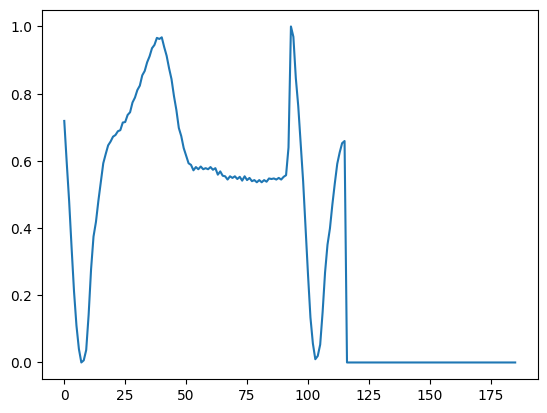

In [13]:
plt.plot(c.iloc[4,:186])

In [14]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

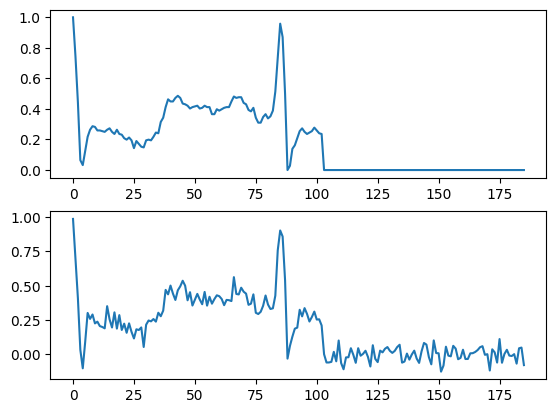

In [15]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [16]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [17]:
y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
#for i in range(len(X_train)):
#    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [19]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [20]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

In [21]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 28s 9ms/step - loss: 0.1900 - accuracy: 0.9319 - val_loss: 0.1472 - val_accuracy: 0.9508
Epoch 2/40
3125/3125 [==============================] - 26s 8ms/step - loss: 0.0752 - accuracy: 0.9750 - val_loss: 0.1480 - val_accuracy: 0.9545
Epoch 3/40
3125/3125 [==============================] - 26s 8ms/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.1333 - val_accuracy: 0.9627
Epoch 4/40
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.1150 - val_accuracy: 0.9691
Epoch 5/40
3125/3125 [==============================] - 23s 7ms/step - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.1292 - val_accuracy: 0.9672
Epoch 6/40
3125/3125 [==============================] - 24s 8ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.1147 - val_accuracy: 0.9769
Epoch 7/40
3125/3125 [==============================] - 24s 8ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.1253 - val_ac

In [22]:
def evaluate_model(history, X_test, y_test, model):
    metrics = ['mae', 'mse', 'msle', 'accuracy', 'precision', 'recall']
    results = {}
    
    
    best_model = model.model
    
    # predicted classes
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    scores = best_model.evaluate(X_test, y_test, verbose=0)
    results['scores'] = scores
    
    # Prediction accuracy
    results['accuracy'] = accuracy_score(y_test, y_pred)
    
    # Precision
    results['precision'] = precision_score(y_test, y_pred, average='binary')
    
    # Recall
    results['recall'] = recall_score(y_test, y_pred, average='binary')
    
    # MAE - Mean Absolute Error
    results['mae'] = mean_absolute_error(y_test, y_pred)
    
    # MSE - Mean Squared Error
    results['mse'] = mean_squared_error(y_test, y_pred)
    
    # MSLE - Mean Squared Logarithmic Error
    results['msle'] = mean_squared_logarithmic_error(y_test, y_pred)
    
    return results

In [23]:
# Assuming 'model' is your trained model
best_model = model
y_pred = best_model.predict(X_test)

# evaluate_model(history,X_test,y_test,model)
y_pred=best_model.predict(X_test)

685/685 [==============================] - 1s 2ms/step


In [24]:
X_train.shape

(100000, 186, 1)

In [25]:
Data1 = train_df.iloc[:,0:187]
Data1.drop_duplicates(keep=False, inplace=True)

In [27]:
index = int(input("Enter Index:"))
index_inp = Data1.loc[[index]]
index_inp

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
231,0.93177,0.665245,0.185501,0.181237,0.21322,0.187633,0.191898,0.185501,0.187633,0.181237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
best_model = load_model("/Users/amitsubedi/Documents/GitHub/Cardio-Vascular-analysis/best_model.h5")

# Print model summary 
best_model.summary()

# Assuming x is the input you want to use for prediction
x = train_df.iloc[2, :186].values
x = x.reshape(1, 186, 1)

y_pred1 = best_model.predict(x)
print(np.round(y_pred1))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_cnn (InputLayer)     [(None, 186, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 181, 64)           448       
                                                                 
 batch_normalization (Batch  (None, 181, 64)           256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 91, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 89, 64)            12352     
                                                                 
 batch_normalization_1 (Bat  (None, 89, 64)            256   

In [ ]:
import numpy as np
y_pred1 = best_model.predict(index_inp)
for x in y_pred1:
    np.round(x) 
    if x[0]==1.0:
      print("N-0th level")
    elif x[1]==1.0:
      print("S-1st level")
    elif x[2]==1.0:
      print("V-2nd level")
    elif x[3]==1.0:
      print("F-3rd level")
    else:
      print("Q-Final level")

1/1 [==============================] - 0s 65ms/step
Q-Final level


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


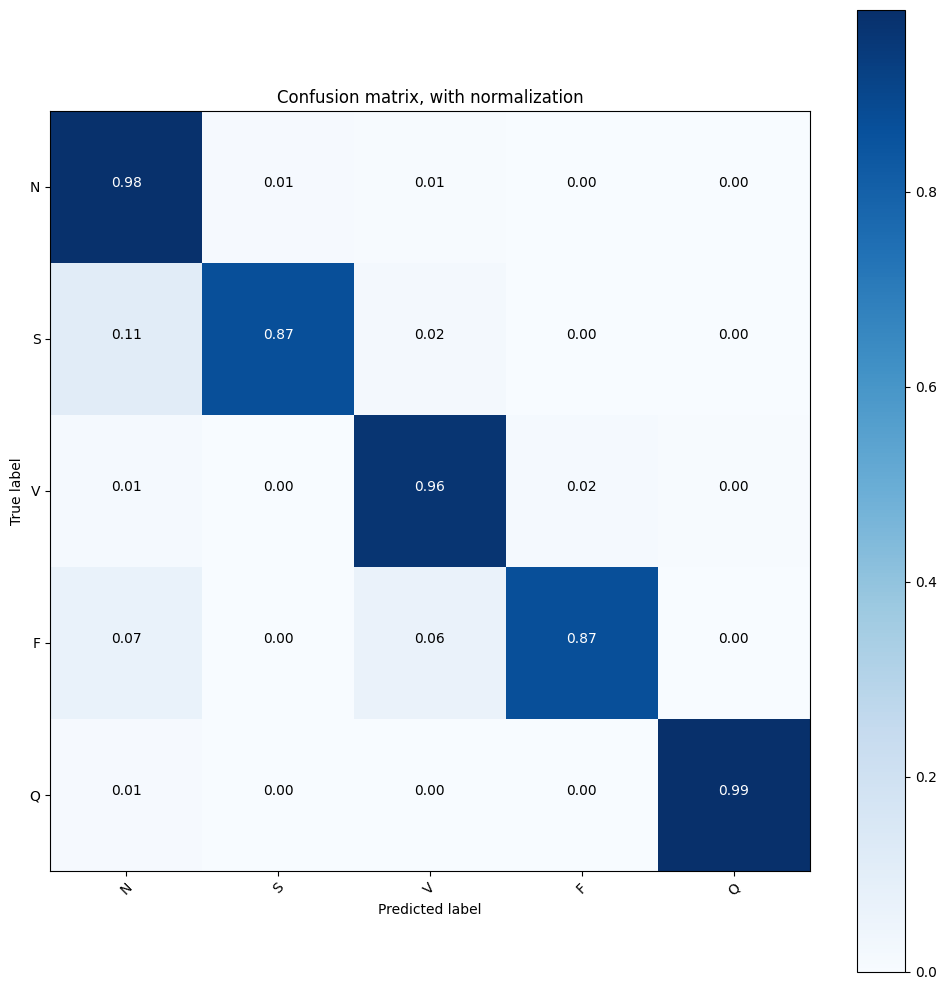

In [ ]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [ ]:
def evaluate_model(history, X_test, y_test, model):
    metrics = ['mae', 'mse', 'msle', 'accuracy', 'precision', 'recall']
    results = {}

    y_pred = model.predict(X_test)

    # Calculating metrics
    for metric in metrics:
        if metric in model.metrics_names:
            metric_value = model.evaluate(X_test, y_test, verbose=0)[model.metrics_names.index(metric)]
            results[metric] = metric_value
    return results

In [ ]:
classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99     18118\n           1       0.73      0.87      0.79       556\n           2       0.92      0.96      0.94      1448\n           3       0.61      0.87      0.72       162\n           4       0.99      0.99      0.99      1608\n\n    accuracy                           0.98     21892\n   macro avg       0.85      0.93      0.88     21892\nweighted avg       0.98      0.98      0.98     21892\n'